In [5]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define path to the dataset
dataset_path = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\dataset'

# Initialize the ImageDataGenerator for normalization and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize the pixel values
    rotation_range=20,    # Random rotation between -20 to 20 degrees
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.15,      # Shear transformations
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'    # Fill in new pixels after a transformation
)

# Load images and apply transformations using flow_from_directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),  # Target size for each image
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

# Inspect a batch of images
x_batch, y_batch = next(train_generator)
print(f'Batch shape: {x_batch.shape}, Labels shape: {y_batch.shape}')


Found 7110 images belonging to 5 classes.
Batch shape: (32, 64, 64, 3), Labels shape: (32, 5)


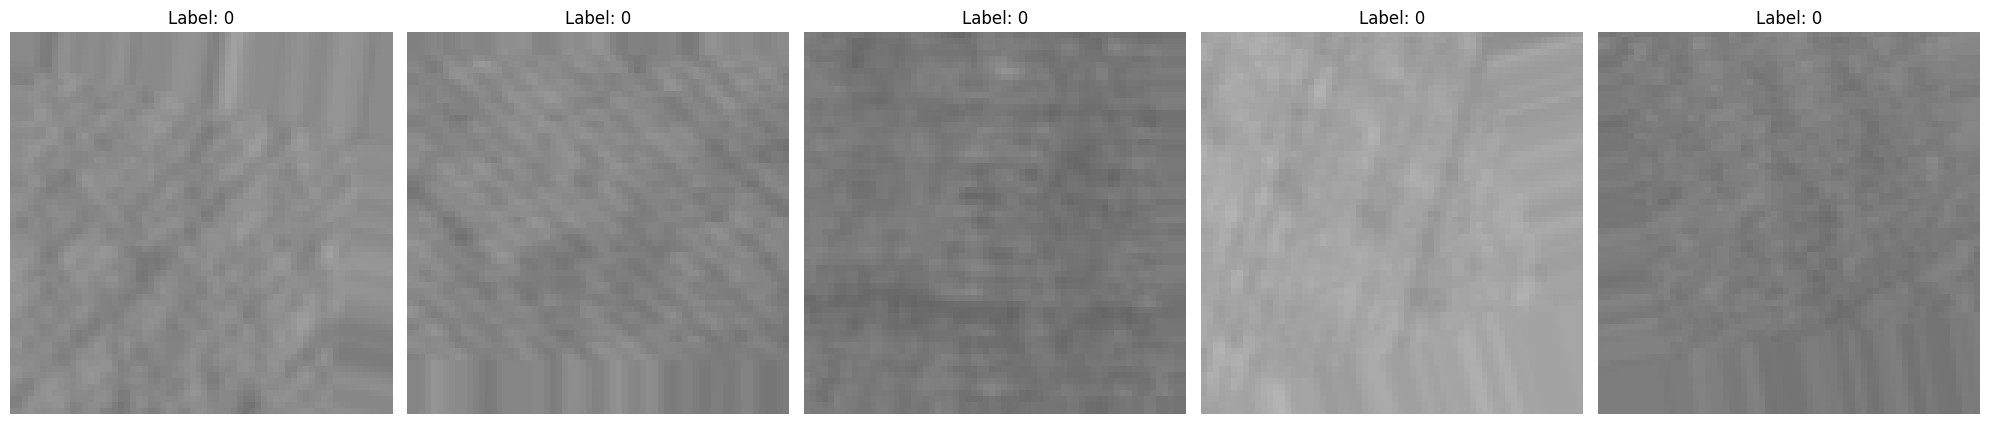

In [7]:
import matplotlib.pyplot as plt

def plot_images(images_arr, labels):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax, lbl in zip(images_arr, axes, labels):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Label: {np.argmax(lbl)}')
    plt.tight_layout()
    plt.show()

# Generate a batch of images
x_batch, y_batch = next(train_generator)

# Plot the images
plot_images(x_batch[:8], y_batch[:9])


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Adjust the number of units to match the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,845 (2.61 MB)

 Trainable params: 683,845 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=600,  # Number of batches per epoch
        epochs=100  # Number of epochs to train
    )


Epoch 1/100


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.6554 - loss: 1.1892  
Epoch 2/100


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


600/600 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.6571 - loss: 1.1241 
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.6548 - loss: 1.1286 
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.6586 - loss: 1.1078 
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.6588 - loss: 1.0899 
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.6584 - loss: 1.0661 
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.6560 - loss: 1.0680 
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.6682 - loss: 1.0361 
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.6679 - loss: 1.0263 
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.6708 - loss: 1.0077 
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.6640 - loss: 1.0198 
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.6678 - loss: 1.0116 
Epoch 13/100
600/60

In [10]:
# Save the entire model as a SavedModel to the specified directory
model.save('C:\\Users\\palak\\Desktop\\EXPOML_fabric\\my_model_updated_3.h5')


In [11]:
# Save the entire model as a SavedModel to the specified directory
model.save('C:\\Users\\palak\\Desktop\\EXPOML_fabric\\my_model_updated_3.keras')


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_path = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\dataset'

# Initialize the ImageDataGenerator with a validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # using 20% of the data for validation
)

# Setup the training generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Setup the validation generator
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 5689 images belonging to 5 classes.
Found 1421 images belonging to 5 classes.


In [13]:
# Evaluate the model on the validation set
eval_result = model.evaluate(validation_generator)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8243 - loss: 0.5703
Test Loss: 0.5614053606987, Test Accuracy: 0.8226600885391235


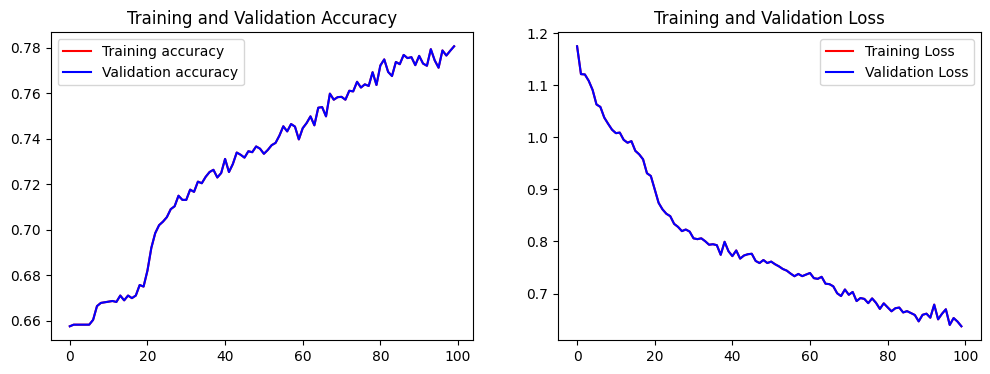

In [14]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history.get('val_accuracy', acc)  # Use validation accuracy if available
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', loss)  # Use validation loss if available

    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call to plot the training history
plot_training_history(history)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Base directory for your dataset
base_dir = r"C:\Users\palak\Desktop\EXPOML_fabric\dataset"  # Adjust this to your dataset's path

# Image size and batch size
image_size = (224, 224)
batch_size = 32

# Data augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Rescaling pixel values (normalization)
    rotation_range=20,          # Randomly rotate images by up to 20 degrees
    zoom_range=0.2,             # Randomly zoom in on images
    horizontal_flip=True,       # Randomly flip images horizontally
    validation_split=0.15       # Use 15% of the data for validation
)

# Data generator for training set
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',   # Multi-class classification
    subset='training'           # Training subset
)

# Data generator for validation set
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',   # Multi-class classification
    subset='validation'         # Validation subset
)

# Check class indices
print(f"Class indices: {train_generator.class_indices}")


Found 6045 images belonging to 5 classes.
Found 1065 images belonging to 5 classes.
Class indices: {'good': 0, 'hole': 1, 'objects': 2, 'oil spot': 3, 'thread error': 4}


Displaying a sample image for 'thread error':


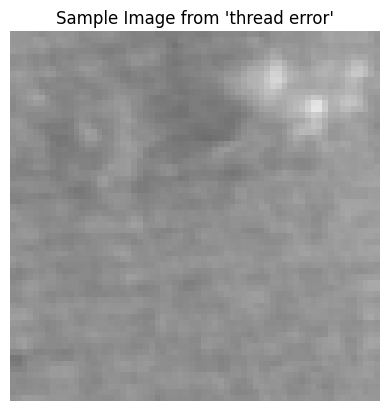

Displaying a sample image for 'oil spot':


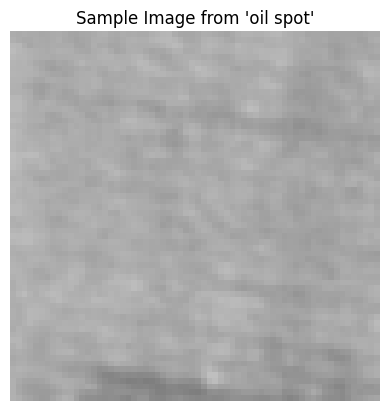

Displaying a sample image for 'objects':


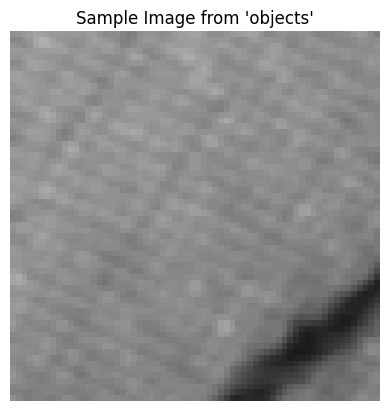

Displaying a sample image for 'hole':


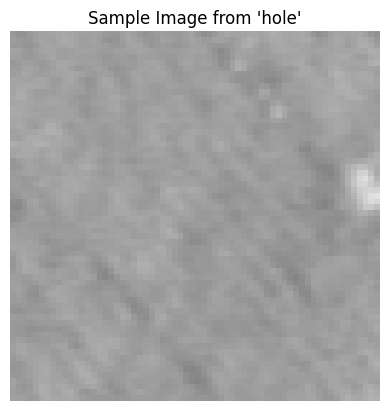

Displaying a sample image for 'good':


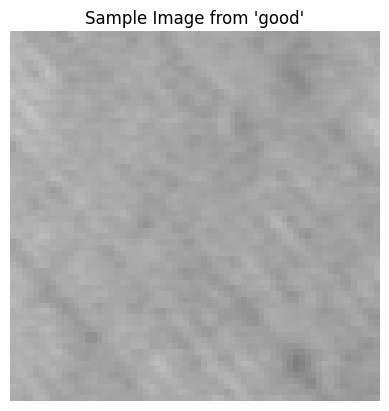

In [16]:
import os
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Base directory
base_dir = r"C:\Users\palak\Desktop\EXPOML_fabric\dataset"

# Categories
categories = ["thread error", "oil spot", "objects", "hole", "good"]

# Function to display a sample image from each category
def display_sample_images(category_name, category_path):
    try:
        # Get the first image in the category
        img_name = os.listdir(category_path)[0]
        img_path = os.path.join(category_path, img_name)
        img = load_img(img_path)
        plt.imshow(img)
        plt.title(f"Sample Image from '{category_name}'")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading image from '{category_name}': {e}")

# Display sample images
for category in categories:
    category_path = os.path.join(base_dir, category)
    print(f"Displaying a sample image for '{category}':")
    display_sample_images(category, category_path)


Augmented Image Pixel Values: min=110.80445098876953, max=225.81947326660156


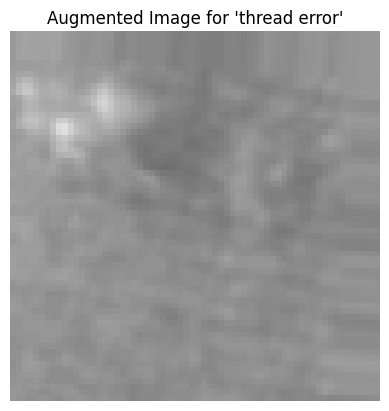

Augmented image saved at C:\Users\palak\Desktop\EXPOML_fabric\dataset\thread error_aug_simple.png


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
import numpy as np
import matplotlib.pyplot as plt

# Define ImageDataGenerator with minimal augmentation
datagen_simple = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Select a single category and image for testing
test_category = "thread error"  # Change as needed
test_image_path = os.path.join(base_dir, test_category, os.listdir(os.path.join(base_dir, test_category))[0])

# Load and preprocess the image
img = load_img(test_image_path, color_mode='rgb')  # Ensure RGB
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate one augmented image
for batch in datagen_simple.flow(x, batch_size=1):
    aug_img = batch[0]
    
    # Check pixel values before saving
    print(f"Augmented Image Pixel Values: min={aug_img.min()}, max={aug_img.max()}")
    
    # Convert to uint8 without scaling
    aug_img_uint8 = np.clip(aug_img, 0, 255).astype(np.uint8)
    
    # Display the augmented image
    plt.imshow(aug_img_uint8)
    plt.title(f"Augmented Image for '{test_category}'")
    plt.axis('off')
    plt.show()
    
    # Save the augmented image
    save_path = os.path.join(base_dir, f"{test_category}_aug_simple.png")
    save_img(save_path, aug_img_uint8)
    print(f"Augmented image saved at {save_path}")
    break  # Only generate one image for testing


In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to inspect pixel values
def inspect_pixel_values(image_path, label="Original"):
    img = load_img(image_path, color_mode='rgb')
    img_array = img_to_array(img)
    print(f"{label} Image Pixel Values: min={img_array.min()}, max={img_array.max()}")

# Inspect original image
inspect_pixel_values(test_image_path, label="Original")

# Inspect augmented image
augmented_image_path = os.path.join(base_dir, f"{test_category}_aug_simple.png")
inspect_pixel_values(augmented_image_path, label="Augmented")


Original Image Pixel Values: min=110.0, max=230.0
Augmented Image Pixel Values: min=0.0, max=255.0


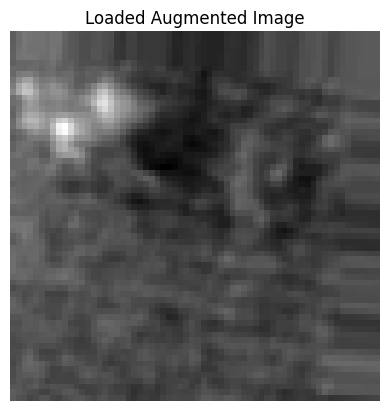

In [19]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Load the saved augmented image
aug_img_loaded = load_img(augmented_image_path)
plt.imshow(aug_img_loaded)
plt.title("Loaded Augmented Image")
plt.axis('off')
plt.show()


Pillow-augmented image saved at C:\Users\palak\Desktop\EXPOML_fabric\dataset\thread error_aug_pillow_pillow.png


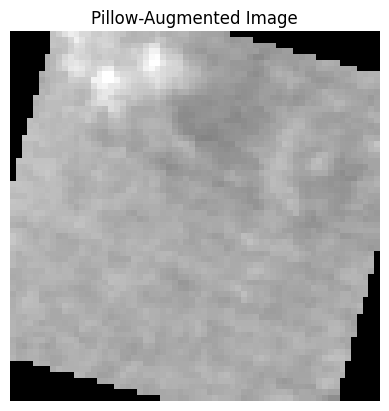

In [20]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Function to perform basic augmentation using Pillow
def augment_with_pillow(image_path, save_path):
    try:
        img = Image.open(image_path)
        
        # Perform simple augmentations
        img_rotated = img.rotate(15)  # Rotate by 15 degrees
        img_flipped = img_rotated.transpose(Image.FLIP_LEFT_RIGHT)  # Horizontal flip
        
        # Enhance brightness
        enhancer = ImageEnhance.Brightness(img_flipped)
        img_bright = enhancer.enhance(1.2)  # Increase brightness by 20%
        
        # Save augmented image
        pillow_save_path = save_path.replace(".png", "_pillow.png")
        img_bright.save(pillow_save_path)
        print(f"Pillow-augmented image saved at {pillow_save_path}")
        
        # Display the augmented image
        plt.imshow(img_bright)
        plt.title("Pillow-Augmented Image")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error during Pillow augmentation: {e}")

# Define save path
pillow_save_path = os.path.join(base_dir, f"{test_category}_aug_pillow.png")

# Perform Pillow augmentation
augment_with_pillow(test_image_path, pillow_save_path)


Displaying a sample image for 'thread error':


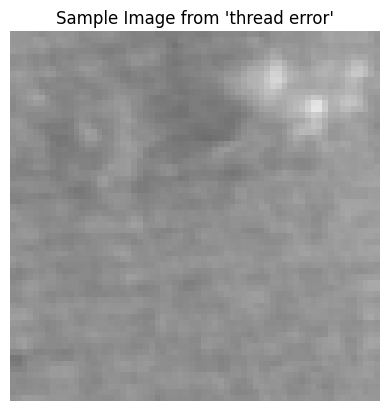

Displaying a sample image for 'oil spot':


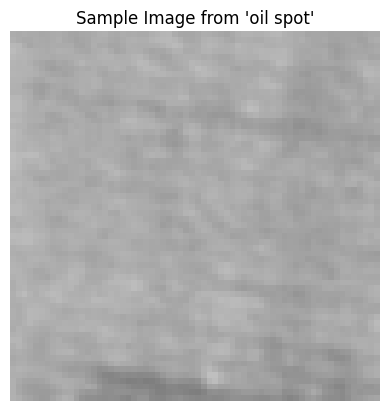

Displaying a sample image for 'objects':


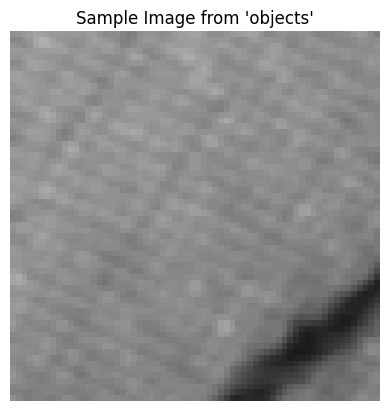

Displaying a sample image for 'hole':


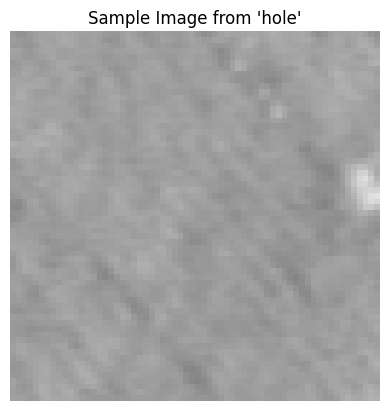

Displaying a sample image for 'good':


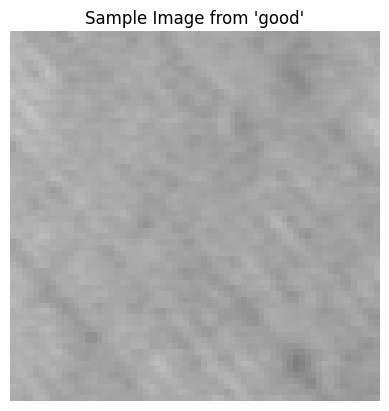

Found 6045 images belonging to 5 classes.
Found 1065 images belonging to 5 classes.
Class indices: {'good': 0, 'hole': 1, 'objects': 2, 'oil spot': 3, 'thread error': 4}


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
import numpy as np
import os
import random
import shutil
import matplotlib.pyplot as plt
from PIL import Image

# Base directory
base_dir = r"C:\Users\palak\Desktop\EXPOML_fabric\dataset"

# Categories
categories = ["thread error", "oil spot", "objects", "hole", "good"]

# Function to verify image validity
def is_image_valid(img_path):
    try:
        with Image.open(img_path) as img:
            img.verify()
        return True
    except:
        return False

# Function to display a sample image from each category
def display_sample_images(category_name, category_path):
    try:
        images = [img for img in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, img)) and is_image_valid(os.path.join(category_path, img))]
        if not images:
            print(f"No valid images found in '{category_name}'.")
            return
        sample_image = images[0]
        img_path = os.path.join(category_path, sample_image)
        img = load_img(img_path)
        plt.imshow(img)
        plt.title(f"Sample Image from '{category_name}'")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading image from '{category_name}': {e}")

# Display sample images
for category in categories:
    category_path = os.path.join(base_dir, category)
    print(f"Displaying a sample image for '{category}':")
    display_sample_images(category, category_path)

# Define ImageDataGenerator with moderate augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15  # 15% for validation
)

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Create training generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Create validation generator
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Check class indices
print(f"Class indices: {train_generator.class_indices}")


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    # Calculate the correct number of input features for the Dense layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to see the output shape of each layer
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


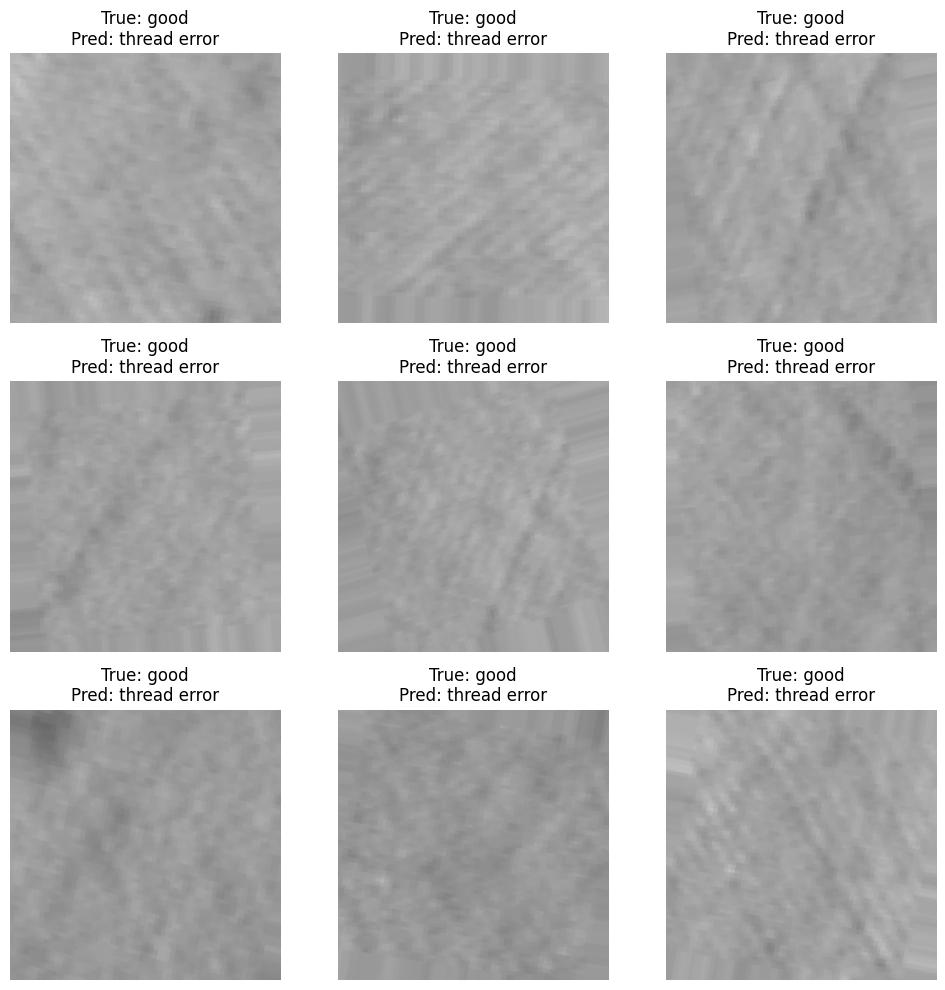

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of validation images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions using the trained model
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)

# Function to display images along with true and predicted labels
def display_predictions(images, true_labels, predicted_labels, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = np.argmax(true_labels[i])
        pred_label = predicted_labels[i]
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get class names from train_generator
class_names = list(train_generator.class_indices.keys())

# Display predictions
display_predictions(validation_images, validation_labels, predicted_classes, class_names)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # Output: (62, 62, 32)
    MaxPooling2D(2, 2),  # Output: (31, 31, 32)
    Conv2D(64, (3, 3), activation='relu'),  # Output: (29, 29, 64)
    MaxPooling2D(2, 2),  # Output: (14, 14, 64)
    Conv2D(128, (3, 3), activation='relu'),  # Output: (12, 12, 128)
    MaxPooling2D(2, 2),  # Output: (6, 6, 128)
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to check output shapes
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,845 (2.61 MB)

 Trainable params: 683,845 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'  # Ensure this is 'categorical'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,  # Make sure this points to your validation data
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'  # Ensure this is 'categorical'
)


Found 7110 images belonging to 5 classes.
Found 7110 images belonging to 5 classes.


In [26]:
print(f"Found {train_generator.samples} images for training.")
print(f"Found {validation_generator.samples} images for validation.")
print(f"Classes: {train_generator.class_indices}")


Found 7110 images for training.
Found 7110 images for validation.
Classes: {'good': 0, 'hole': 1, 'objects': 2, 'oil spot': 3, 'thread error': 4}


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ensure this matches the number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,845 (2.61 MB)

 Trainable params: 683,845 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)


Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step - accuracy: 0.6446 - loss: 1.2080 - val_accuracy: 0.6582 - val_loss: 1.1084
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 35s 157ms/step - accuracy: 0.6683 - loss: 1.1080 - val_accuracy: 0.6582 - val_loss: 1.0826
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 158ms/step - accuracy: 0.6585 - loss: 1.1198 - val_accuracy: 0.6582 - val_loss: 1.0582
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 152ms/step - accuracy: 0.6507 - loss: 1.0998 - val_accuracy: 0.6671 - val_loss: 1.0320
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 160ms/step - accuracy: 0.6698 - loss: 1.0382 - val_accuracy: 0.6689 - val_loss: 1.0035
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 37s 165ms/step - accuracy: 0.6594 - loss: 1.0513 - val_accuracy: 0.6691 - val_loss: 0.9842
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 161ms/step - accuracy: 0.6701 - loss: 1.0048 - val_accuracy: 0.6712 - val_loss: 0.9680
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 37s 164ms/step - accuracy: 0.6769 -

223/223 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.8308 - loss: 0.4979
Validation Loss: 0.49565401673316956, Validation Accuracy: 0.8299577832221985


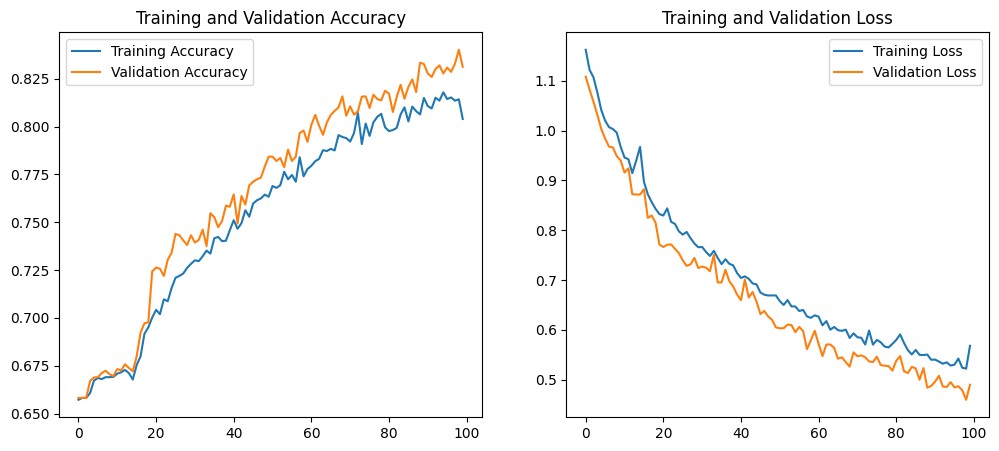

In [29]:
# Evaluate the model
eval_result = model.evaluate(validation_generator)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}")

# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


In [30]:
# Define the path where you want to save your model
model_save_path = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\new_updated_model_version_4.h5'
model_save_path = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\new_updated_model_version_4.keras'

# Save the model
model.save(model_save_path)

print(f"Model saved successfully at {model_save_path}")


Model saved successfully at C:\Users\palak\Desktop\EXPOML_fabric\new_updated_model_version_4.keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


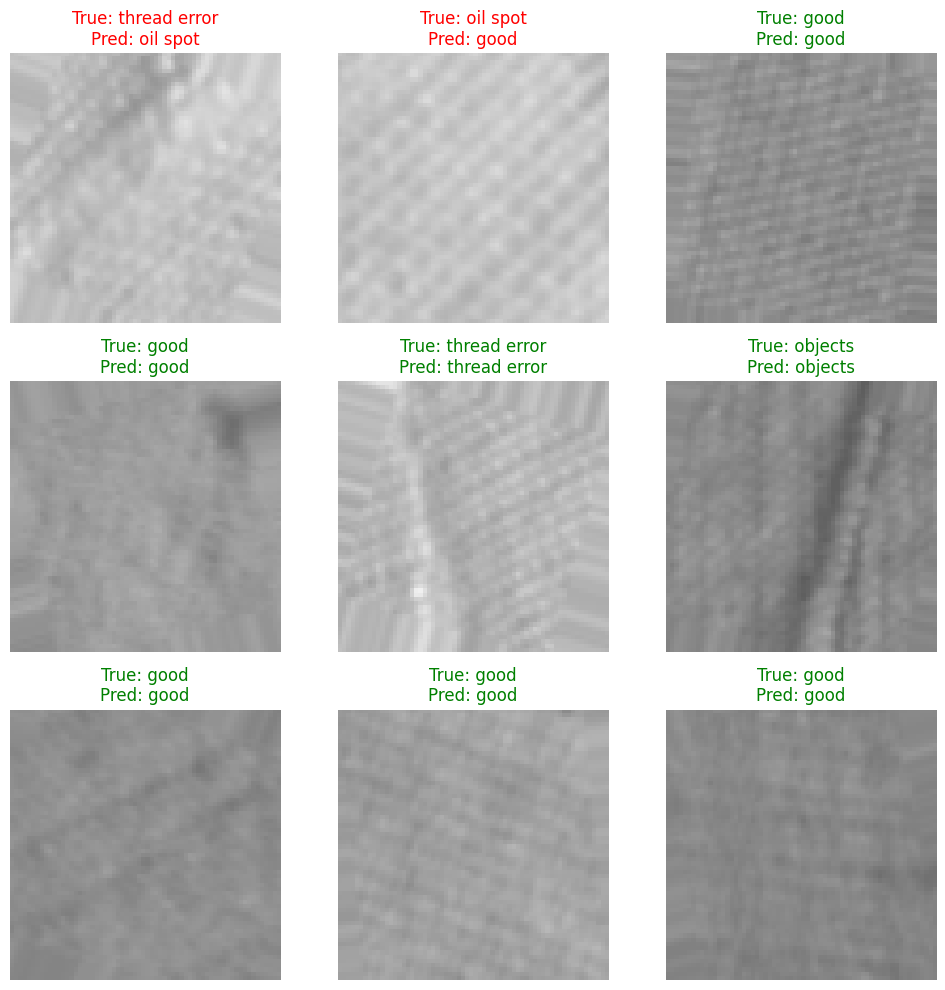

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels from the validation generator
validation_images, validation_labels = next(validation_generator)

# Make predictions using the trained model
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Function to display images along with true and predicted labels
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


In [32]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming you have 5 classes
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

# Fit the model with adjusted class weights
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    class_weight=class_weights
)


Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 157ms/step - accuracy: 0.7451 - loss: 0.9901 - val_accuracy: 0.8098 - val_loss: 0.6106
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 161ms/step - accuracy: 0.7294 - loss: 0.9254 - val_accuracy: 0.7948 - val_loss: 0.6173
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.7596 - loss: 0.8787 - val_accuracy: 0.8143 - val_loss: 0.5515
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 35s 153ms/step - accuracy: 0.7652 - loss: 0.8843 - val_accuracy: 0.7457 - val_loss: 0.6733
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 158ms/step - accuracy: 0.7613 - loss: 0.8490 - val_accuracy: 0.8166 - val_loss: 0.6231
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 160ms/step - accuracy: 0.7554 - loss: 0.8709 - val_accuracy: 0.7540 - val_loss: 0.6925
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 35s 154ms/step - accuracy: 0.7452 - loss: 0.8382 - val_accuracy: 0.7679 - val_loss: 0.6603
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 160ms/step - accuracy: 0.7524 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


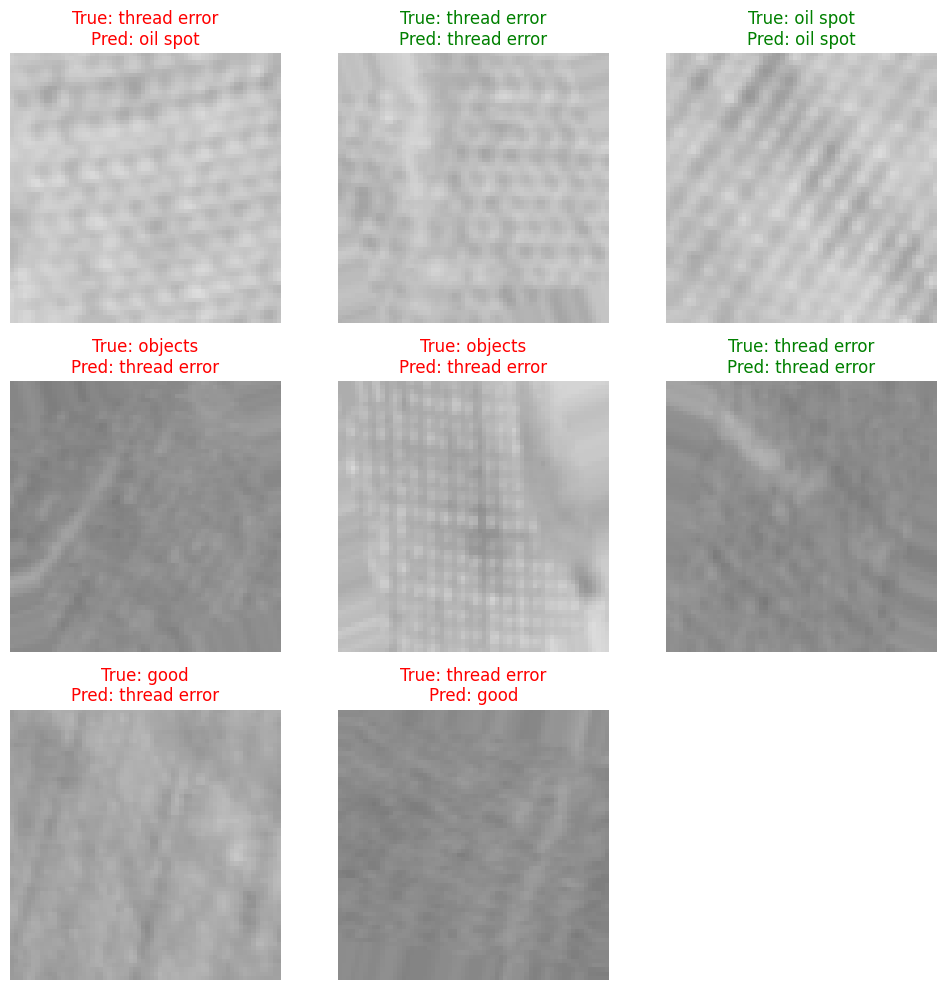

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def display_defected_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    defect_classes = ['oil spot', 'thread error']  # Classes of interest
    indices = [i for i in range(len(predicted_labels)) if class_names[true_labels[i]] in defect_classes or class_names[predicted_labels[i]] in defect_classes]

    # If there are fewer defect images than num_images, adjust num_images
    num_images = min(num_images, len(indices))
    
    plt.figure(figsize=(10, 10))
    for idx in range(num_images):
        i = indices[idx]  # Get the index of the defect image
        plt.subplot(3, 3, idx + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fetch a batch of images and labels from the validation generator
validation_images, validation_labels = next(validation_generator)

# Make predictions using the trained model
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Display predictions focusing on defects
display_defected_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


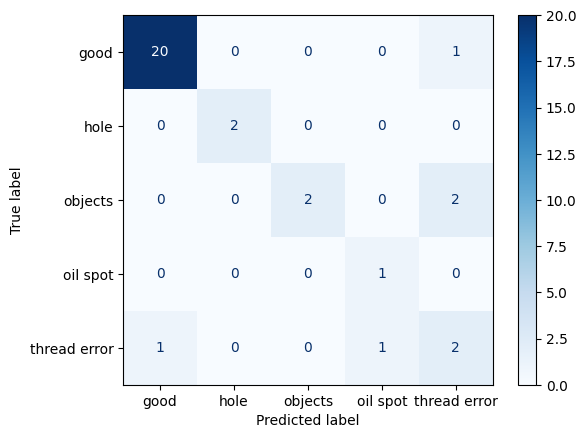

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions and true labels
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=list(train_generator.class_indices.values()))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [35]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights inversely proportional to class frequencies
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

# Train the model using these weights
history = model.fit(
    train_generator,
    epochs=150,
    validation_data=validation_generator,
    class_weight=class_weights_dict
)


Epoch 1/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - accuracy: 0.7797 - loss: 0.6482 - val_accuracy: 0.8262 - val_loss: 0.5077
Epoch 2/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 32s 142ms/step - accuracy: 0.7650 - loss: 0.7001 - val_accuracy: 0.8399 - val_loss: 0.4894
Epoch 3/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 33s 145ms/step - accuracy: 0.7923 - loss: 0.6830 - val_accuracy: 0.7639 - val_loss: 0.6717
Epoch 4/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 33s 145ms/step - accuracy: 0.7812 - loss: 0.6989 - val_accuracy: 0.8174 - val_loss: 0.5173
Epoch 5/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.8011 - loss: 0.6339 - val_accuracy: 0.7930 - val_loss: 0.5548
Epoch 6/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 32s 142ms/step - accuracy: 0.7655 - loss: 0.6745 - val_accuracy: 0.8198 - val_loss: 0.5430
Epoch 7/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 33s 144ms/step - accuracy: 0.7882 - loss: 0.6868 - val_accuracy: 0.8238 - val_loss: 0.5191
Epoch 8/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 32s 142ms/step - accuracy: 0.7773 -

In [36]:
eval_result = model.evaluate(validation_generator)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}")


223/223 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.8183 - loss: 0.5041
Validation Loss: 0.5059851408004761, Validation Accuracy: 0.8212376832962036


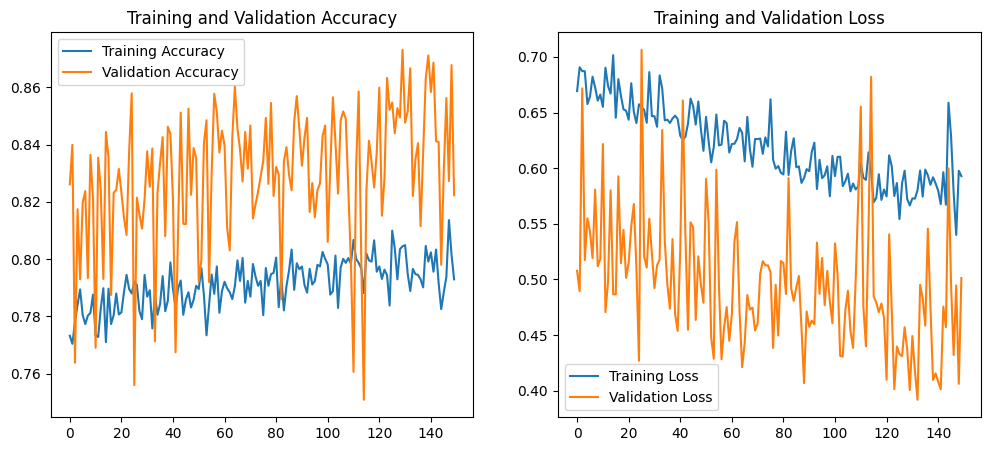

In [37]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', [])

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


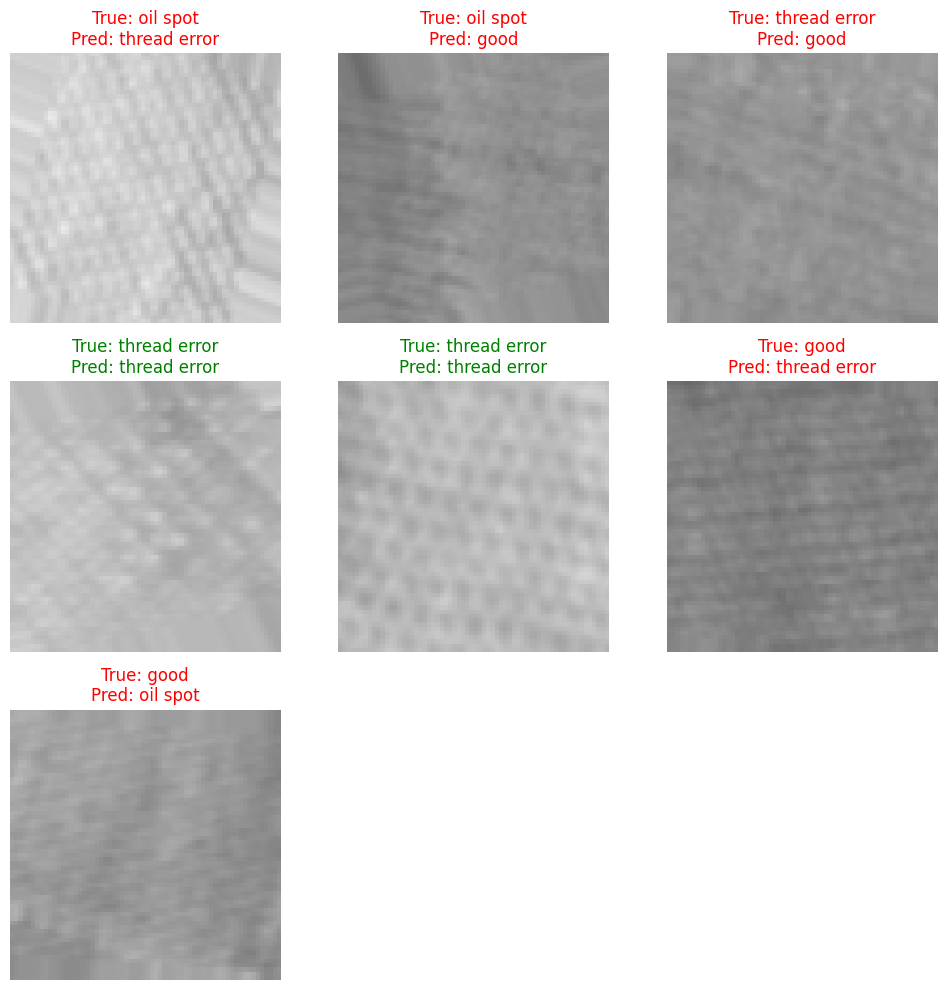

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def display_defected_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    defect_classes = ['oil spot', 'thread error']  # Classes of interest
    indices = [i for i in range(len(predicted_labels)) if class_names[true_labels[i]] in defect_classes or class_names[predicted_labels[i]] in defect_classes]

    # If there are fewer defect images than num_images, adjust num_images
    num_images = min(num_images, len(indices))
    
    plt.figure(figsize=(10, 10))
    for idx in range(num_images):
        i = indices[idx]  # Get the index of the defect image
        plt.subplot(3, 3, idx + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fetch a batch of images and labels from the validation generator
validation_images, validation_labels = next(validation_generator)

# Make predictions using the trained model
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Display predictions focusing on defects
display_defected_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


In [39]:
# Define the path where you want to save your model
model_save_path = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\new_updated_model_version_2correct.h5'
model_save_path = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\new_updated_model_version_2correct.keras'

# Save the model
model.save(model_save_path)

print(f"Model saved successfully at {model_save_path}")


Model saved successfully at C:\Users\palak\Desktop\EXPOML_fabric\new_updated_model_version_2correct.keras


In [40]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input, Softmax, Multiply
from tensorflow.keras.models import Model

def attention_module(inputs, channels):
    # Attention - learnable weights for channels
    attention = Dense(units=channels, activation='softmax')(inputs)
    multiplied = Multiply()([inputs, attention])
    return multiplied

# Define inputs
inputs = Input(shape=(64, 64, 3))
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = attention_module(x, 32)  # Apply attention
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)

# Create and compile model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
import datetime
from tensorflow.keras.callbacks import TensorBoard
import time

# Create a TensorBoard instance with log directory
log_dir = 'logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model with TensorBoard callback
model.fit(
    x=train_generator,
    epochs=150,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
)


Epoch 1/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 51s 208ms/step - accuracy: 0.6412 - loss: 1.1933 - val_accuracy: 0.6582 - val_loss: 1.1022
Epoch 2/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 47s 207ms/step - accuracy: 0.6622 - loss: 1.1205 - val_accuracy: 0.6582 - val_loss: 1.0783
Epoch 3/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 36s 161ms/step - accuracy: 0.6597 - loss: 1.0990 - val_accuracy: 0.6582 - val_loss: 1.1098
Epoch 4/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 35s 154ms/step - accuracy: 0.6513 - loss: 1.1085 - val_accuracy: 0.6582 - val_loss: 1.0867
Epoch 5/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.6504 - loss: 1.1132 - val_accuracy: 0.6582 - val_loss: 1.0705
Epoch 6/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 62s 274ms/step - accuracy: 0.6561 - loss: 1.0808 - val_accuracy: 0.6582 - val_loss: 1.0348
Epoch 7/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 60s 267ms/step - accuracy: 0.6558 - loss: 1.0605 - val_accuracy: 0.6582 - val_loss: 1.0114
Epoch 8/150
223/223 ━━━━━━━━━━━━━━━━━━━━ 3318s 15s/step - accuracy: 0.6591 -

In [43]:
# Define the path to save your model
model_save_path = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\trained_model_post_2_correct.h5'

# Save the model
model.save(model_save_path)
print(f"Model saved successfully at {model_save_path}")


Model saved successfully at C:\Users\palak\Desktop\EXPOML_fabric\trained_model_post_2_correct.h5


In [44]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model(model_save_path)

# Evaluate the model on the validation data
eval_result = model.evaluate(validation_generator)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}")


223/223 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.8156 - loss: 0.5372
Validation Loss: 0.5329709053039551, Validation Accuracy: 0.8188467025756836


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


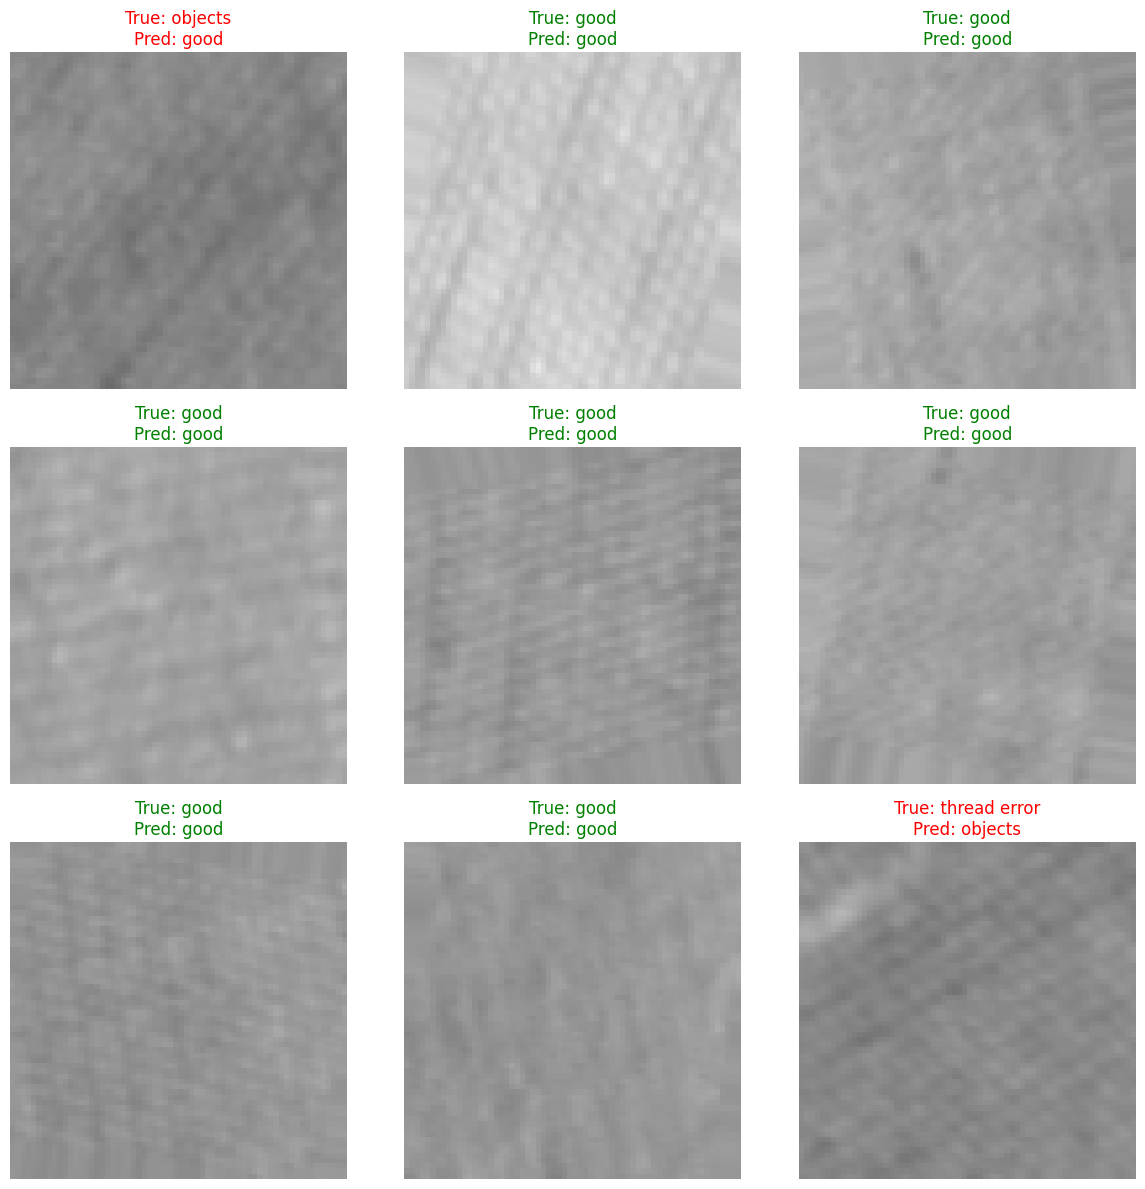

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Visualization function
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


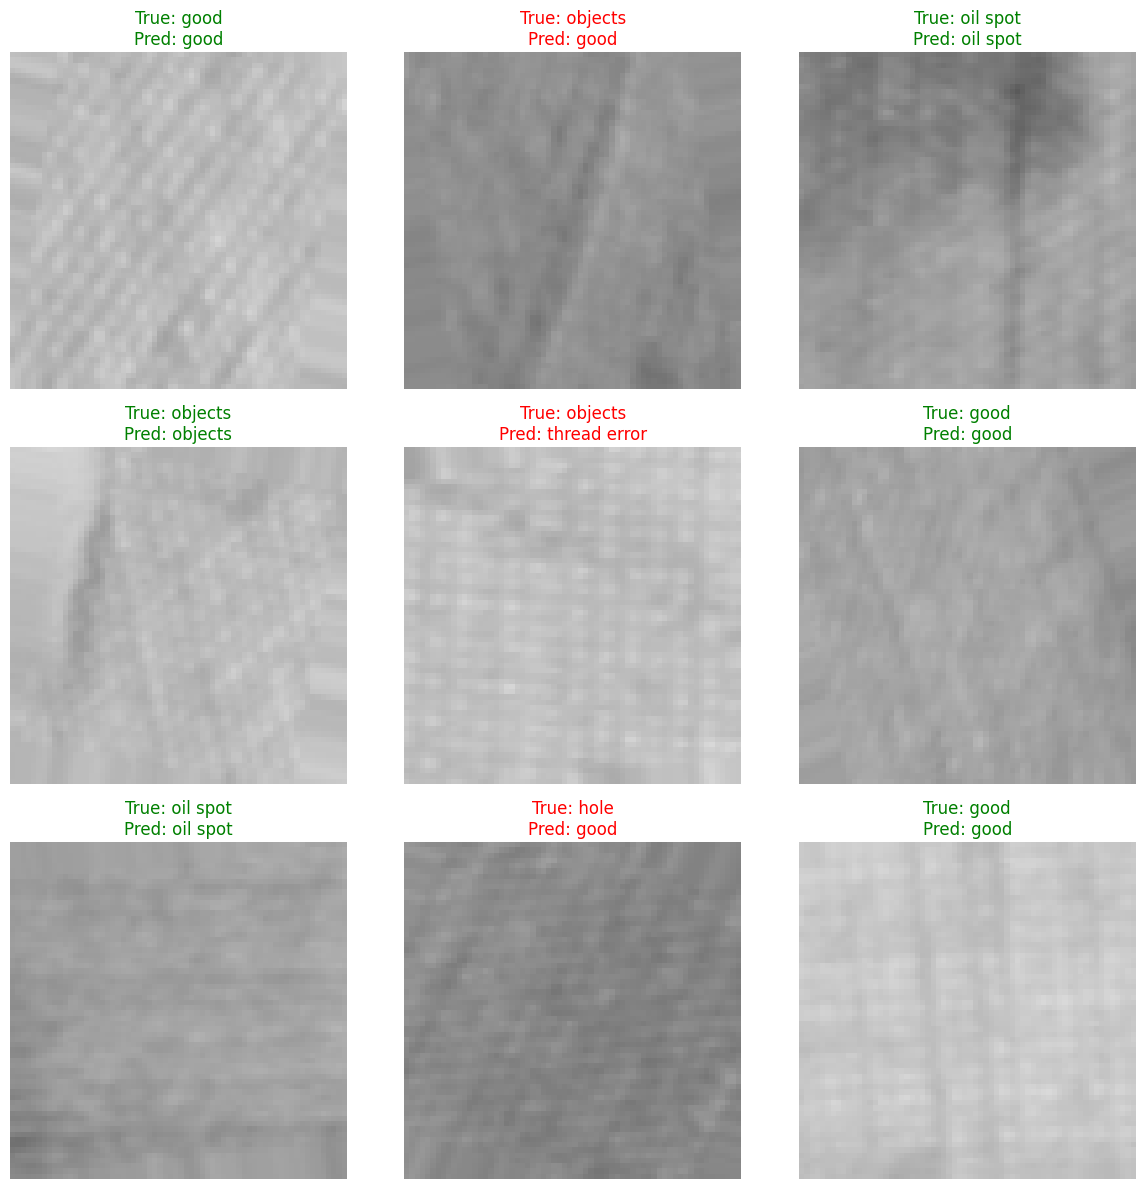

In [46]:
  import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Visualization function
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


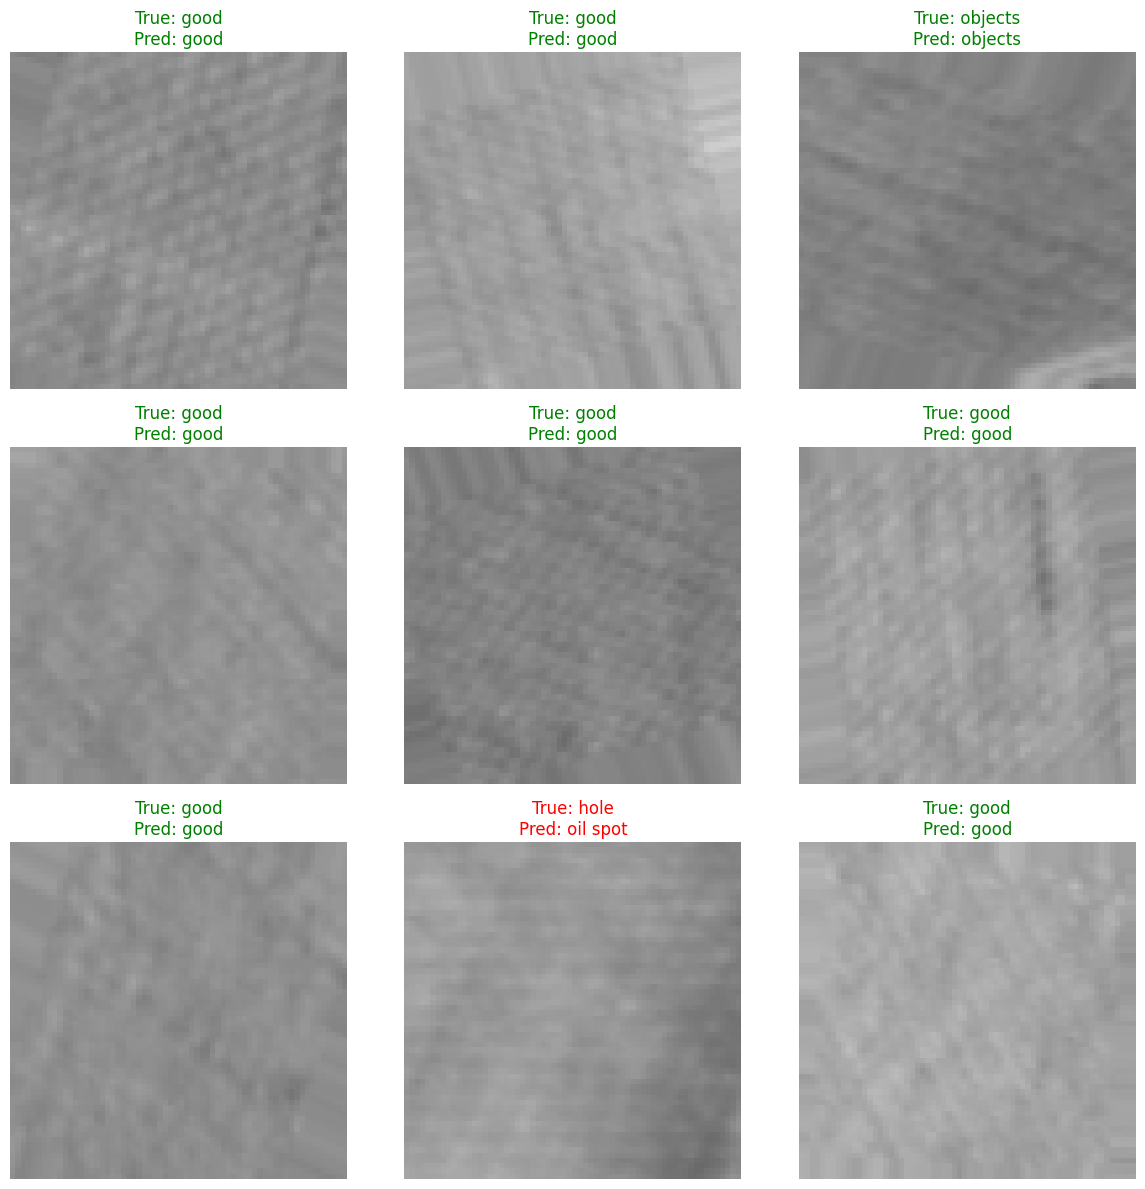

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Visualization function
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


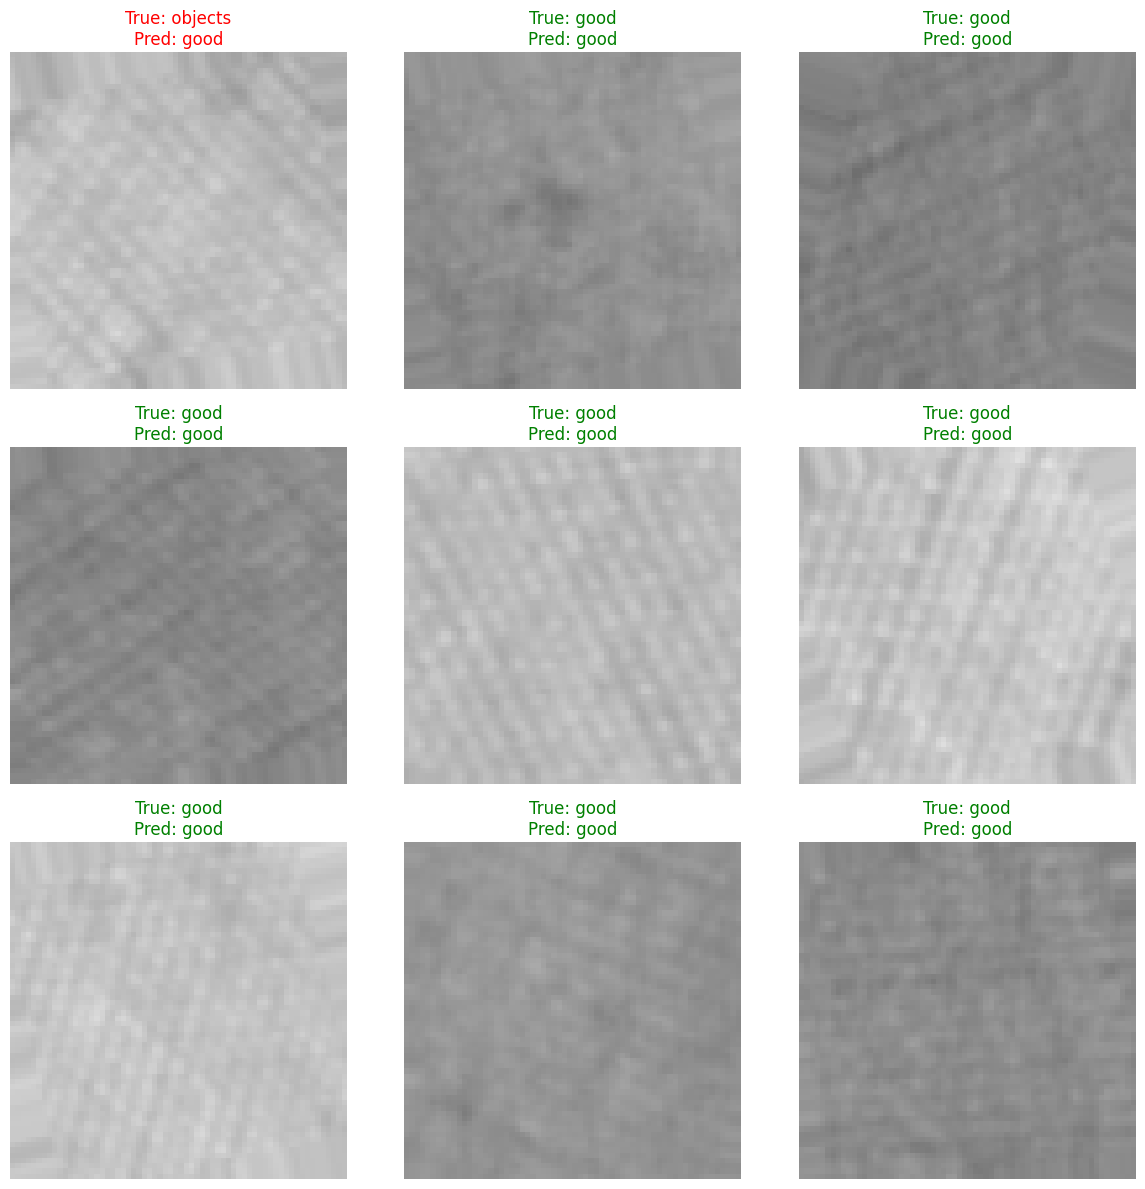

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Visualization function
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


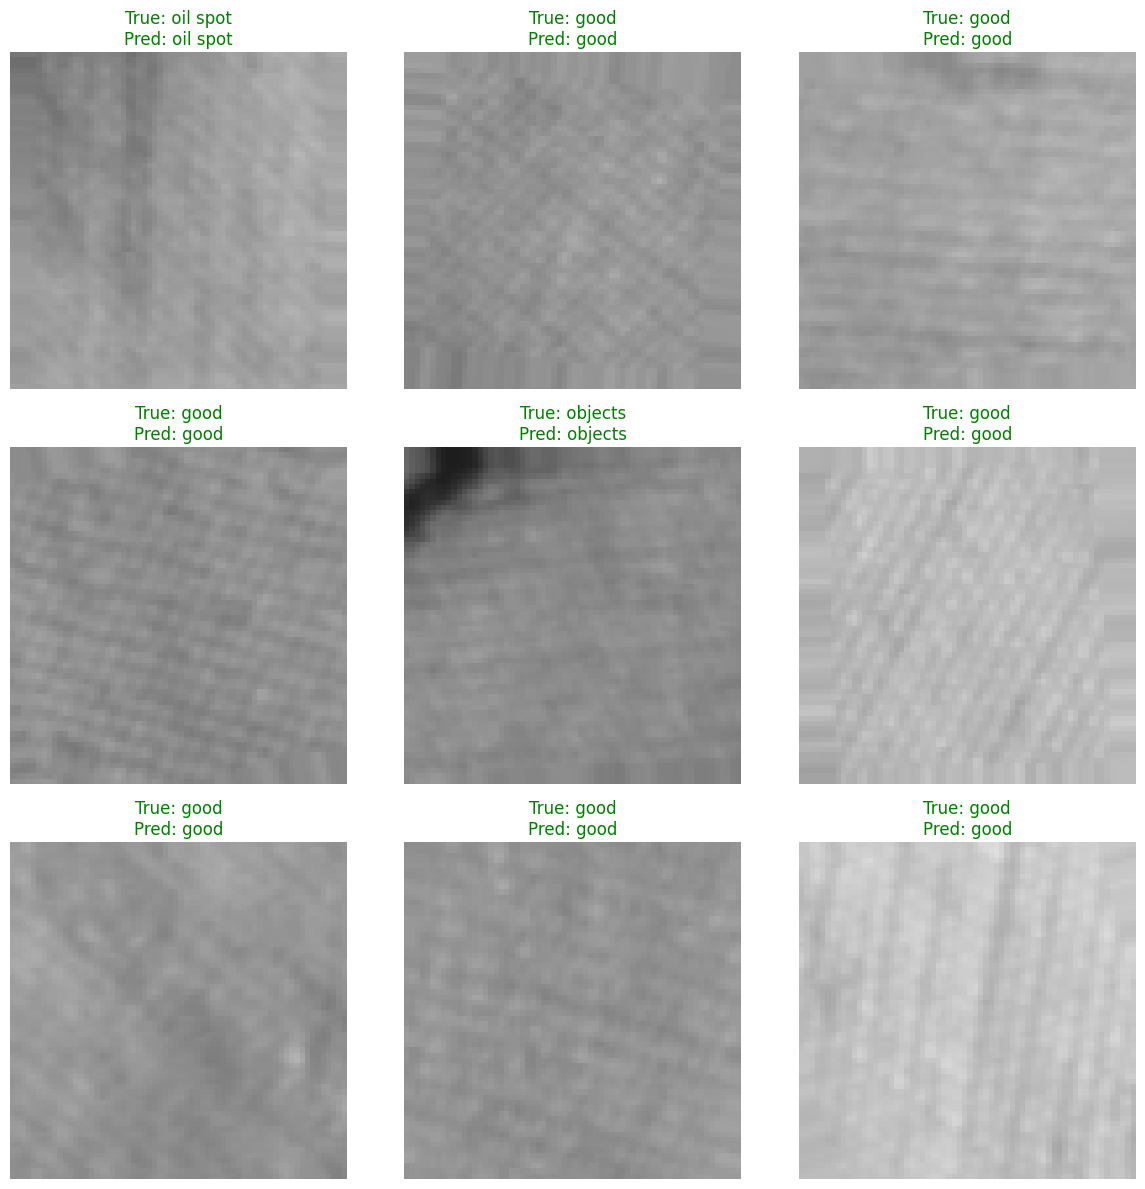

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Visualization function
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


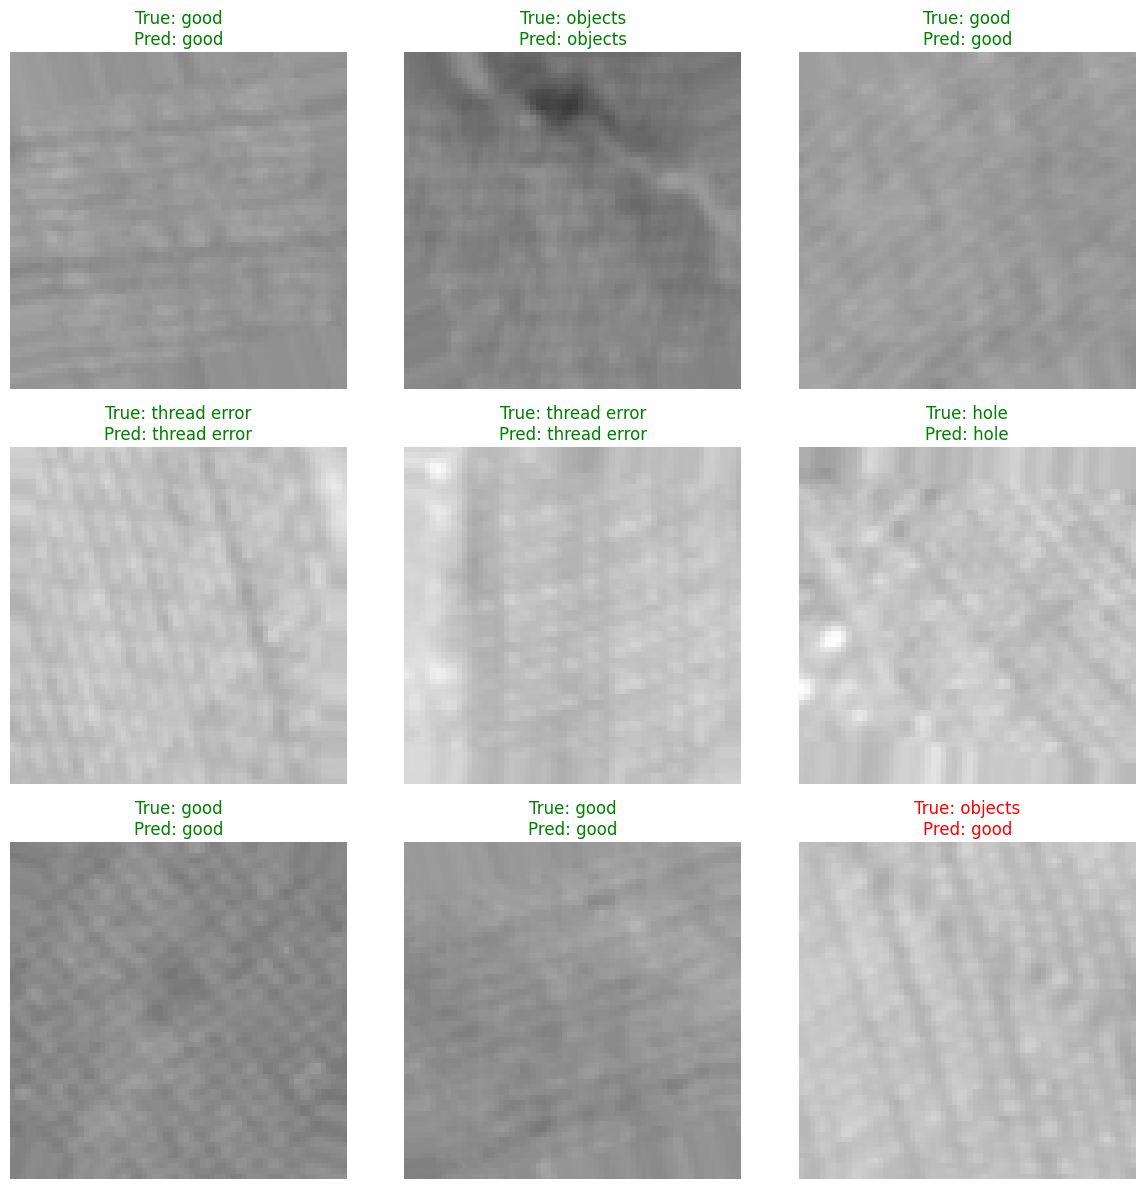

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Visualization function
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


In [51]:
# Define the path to save your model
model_save_path = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\trained_model_post_2_correct.keras'

# Save the model
model.save(model_save_path)
print(f"Model saved successfully at {model_save_path}")


Model saved successfully at C:\Users\palak\Desktop\EXPOML_fabric\trained_model_post_2_correct.keras


In [53]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(5, activation='softmax')(x)  # Adjust the number of units to match the number of classes

model = Model(inputs=base_model.input, outputs=output)

# Compile the model with the corrected parameter name for learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Summarize the model structure
model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 32, 32, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 32, 32, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 16, 16, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 16, 16, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [54]:
# Define the training parameters
epochs = 50  # Set a suitable number of epochs
batch_size = 100  # Set a suitable batch size

# Start the training process
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator
)


Epoch 1/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 133s 543ms/step - accuracy: 0.6270 - loss: 1.1714 - val_accuracy: 0.6582 - val_loss: 1.1066
Epoch 2/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 107s 478ms/step - accuracy: 0.6577 - loss: 1.1044 - val_accuracy: 0.6582 - val_loss: 1.0952
Epoch 3/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 92s 409ms/step - accuracy: 0.6594 - loss: 1.0940 - val_accuracy: 0.6582 - val_loss: 1.0850
Epoch 4/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 98s 437ms/step - accuracy: 0.6604 - loss: 1.0816 - val_accuracy: 0.6591 - val_loss: 1.0721
Epoch 5/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 95s 422ms/step - accuracy: 0.6640 - loss: 1.0688 - val_accuracy: 0.6610 - val_loss: 1.0600
Epoch 6/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 96s 429ms/step - accuracy: 0.6608 - loss: 1.0600 - val_accuracy: 0.6640 - val_loss: 1.0626
Epoch 7/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 91s 409ms/step - accuracy: 0.6695 - loss: 1.0372 - val_accuracy: 0.6637 - val_loss: 1.0279
Epoch 8/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 107s 477ms/step - accuracy: 0.6611 - loss

In [55]:
# Define the path to save your model
model_save_path = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\resnet_model.h5'

# Save the model
model.save(model_save_path)
print(f"Model saved successfully at {model_save_path}")


Model saved successfully at C:\Users\palak\Desktop\EXPOML_fabric\resnet_model.h5


In [56]:
# Evaluate the model
eval_result = model.evaluate(validation_generator)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}")


223/223 ━━━━━━━━━━━━━━━━━━━━ 47s 210ms/step - accuracy: 0.6726 - loss: 1.0671
Validation Loss: 1.0422455072402954, Validation Accuracy: 0.6796061992645264


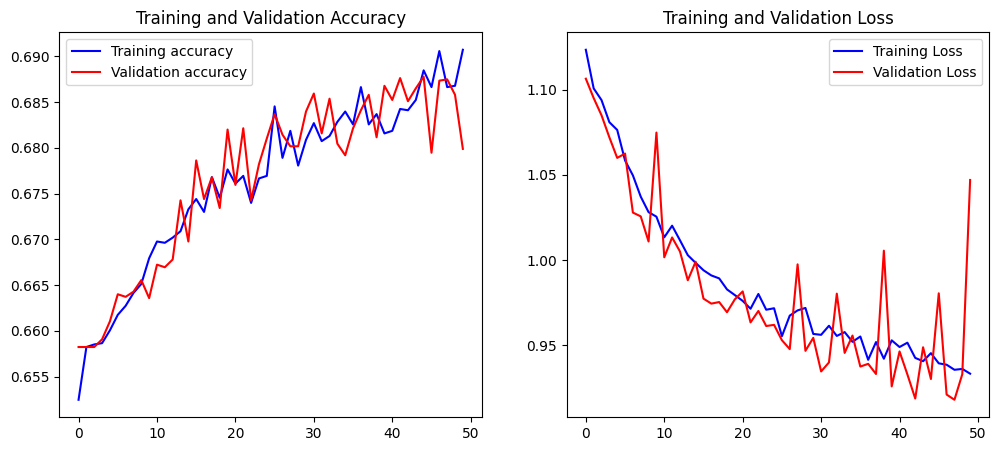

In [57]:
import matplotlib.pyplot as plt

# Function to plot the training and validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call the function to plot the curves
plot_training_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


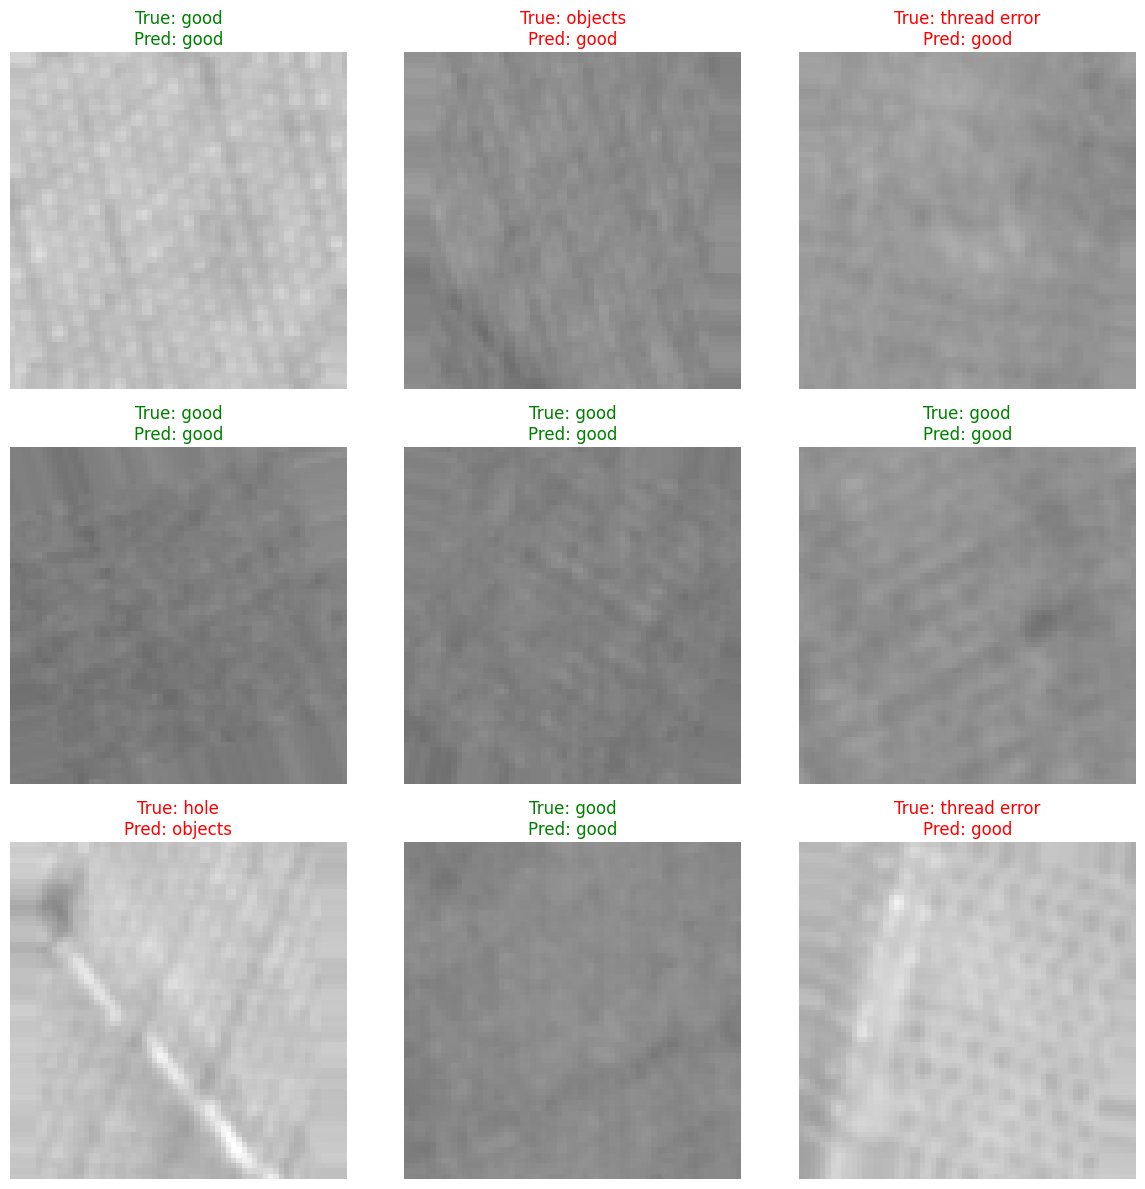

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Visualization function
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


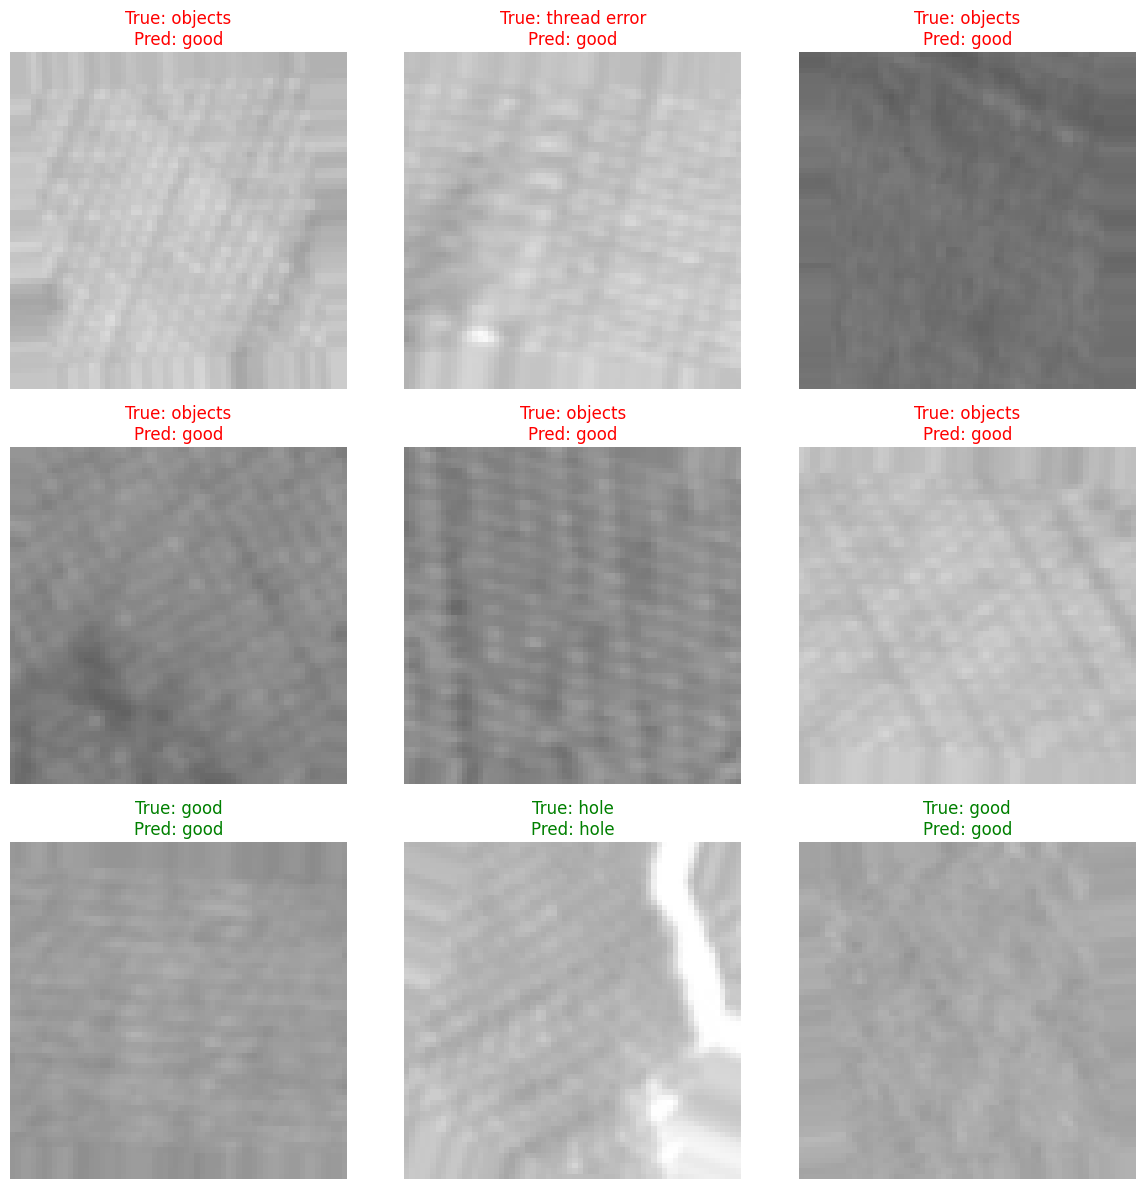

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Visualization function
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


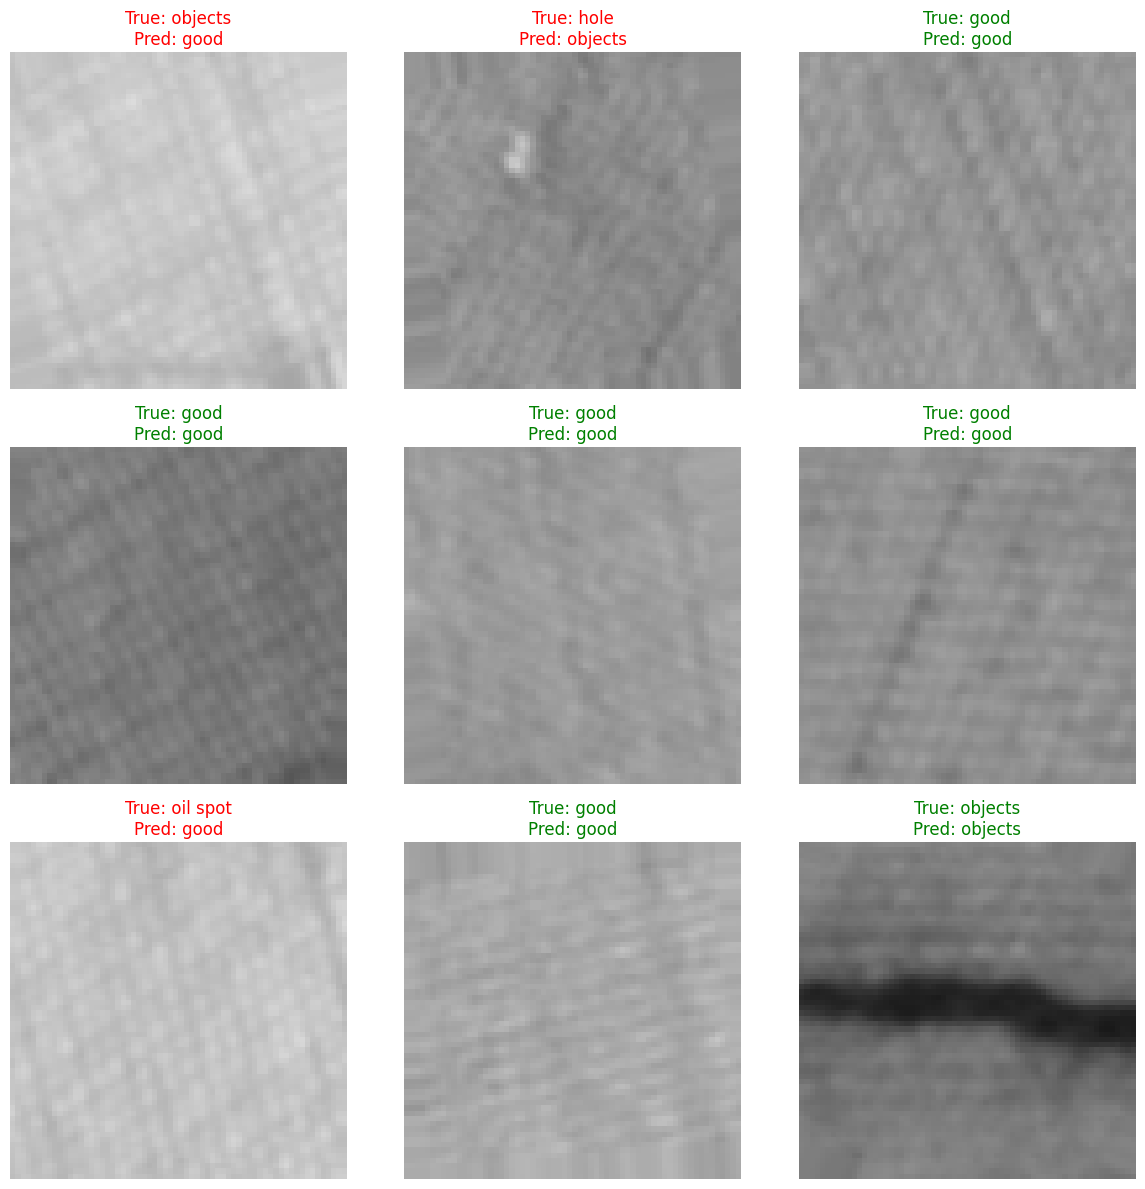

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions
predictions = model.predict(validation_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(validation_labels, axis=1)

# Visualization function
def display_predictions(images, true_labels, predicted_labels, class_indices, num_images=9):
    class_names = list(class_indices.keys())  # Get class names from indices
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the predictions
display_predictions(validation_images, true_classes, predicted_classes, train_generator.class_indices)


In [63]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assume 'classes' are an array of all class labels in the training set
classes = np.array([train_generator.class_indices[key] for key in train_generator.class_indices])

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}

# Use these weights in training
model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    class_weight=class_weight_dict
)


Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 128s 522ms/step - accuracy: 0.4666 - loss: 1.5802 - val_accuracy: 0.6525 - val_loss: 1.1331
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 117s 522ms/step - accuracy: 0.5544 - loss: 1.4529 - val_accuracy: 0.0999 - val_loss: 2.0143
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 118s 526ms/step - accuracy: 0.4920 - loss: 1.4819 - val_accuracy: 0.4584 - val_loss: 1.4603
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 119s 533ms/step - accuracy: 0.5243 - loss: 1.4601 - val_accuracy: 0.6546 - val_loss: 1.1963
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 116s 517ms/step - accuracy: 0.5544 - loss: 1.4383 - val_accuracy: 0.4752 - val_loss: 1.4648
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 117s 521ms/step - accuracy: 0.5251 - loss: 1.4615 - val_accuracy: 0.6661 - val_loss: 1.1293
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 119s 530ms/step - accuracy: 0.5641 - loss: 1.4559 - val_accuracy: 0.6429 - val_loss: 1.1930
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 119s 530ms/step - accuracy: 

In [64]:
import tensorflow as tf

def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        alpha_t = y_true*alpha + (tf.keras.backend.ones_like(y_true) - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (tf.keras.backend.ones_like(y_true) - y_true) * (1 - y_pred)
        fl = - alpha_t * tf.keras.backend.pow((tf.keras.backend.ones_like(y_true) - p_t), gamma) * tf.keras.backend.log(p_t)
        return tf.keras.backend.mean(fl)
    return focal_loss_fixed

# Compile the model with focal loss
model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])


In [66]:
import os
import shutil
import numpy as np

def create_splits(source_dir, target_dir, train_ratio=0.6, val_ratio=0.2):
    classes = ['good', 'hole', 'objects', 'oil_spot', 'thread_error']
    sub_dirs = ['train', 'validation', 'test']

    # Create target subdirectories
    for sub_dir in sub_dirs:
        for class_name in classes:
            os.makedirs(os.path.join(target_dir, sub_dir, class_name), exist_ok=True)

    # Copy files to new directories
    for class_name in classes:
        class_dir = os.path.join(source_dir, class_name)
        files = os.listdir(class_dir)
        np.random.shuffle(files)  # Shuffle to ensure randomness
        
        # Compute split indices
        train_end = int(len(files) * train_ratio)
        val_end = train_end + int(len(files) * val_ratio)

        # Define splits
        splits = {
            'train': files[:train_end],
            'validation': files[train_end:val_end],
            'test': files[val_end:]
        }

        # Copy files to the corresponding new directories
        for split_name, split_files in splits.items():
            for file in split_files:
                src_file_path = os.path.join(class_dir, file)
                dest_file_path = os.path.join(target_dir, split_name, class_name, file)
                shutil.copy(src_file_path, dest_file_path)

# Define the source and target directories
source_dir = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\dataset'
target_dir = 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\splitted_dataset'

# Execute the function to create dataset splits
create_splits(source_dir, target_dir)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\palak\\Desktop\\EXPOML_fabric\\dataset\\oil_spot'